In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.fingerprinter import Fingerprinter
from utils.visualization import plot_regression_histograms

from sklearn.svm import SVR

%load_ext autoreload
%autoreload 2

## Datasets

In [2]:
train = pd.read_csv('../train_clean.csv')
test = pd.read_csv('../test_clean.csv')
properties = train.columns[1:]

In [3]:
fingerprinter = Fingerprinter()

train_X = fingerprinter(train['SMILES'].tolist())
test_X = fingerprinter(test['SMILES'].tolist())

n_features = train_X.shape[1]
print(f'Fingerprints have {n_features} features')

Fingerprints have 2048 features


## Train SVRs

In [4]:
params = dict(
    c=1, 
    gamma=0
)

svr_dict = {property_label : SVR()
        for property_label in properties}

In [5]:
for property_label, svr in svr_dict.items():

    print(f'Training SVR for {property_label}...', end='')
    train_Y = train[property_label]
    svr.fit(train_X, train_Y)
    print(f'Done')

Training SVR for Viability Mask 1...Done
Training SVR for Viability Mask 2...Done
Training SVR for LPS Abs...Done
Training SVR for LPS Lum...Done
Training SVR for MPLA Abs...Done
Training SVR for MPLA Lum...Done
Training SVR for CpG Abs...Done
Training SVR for cGAMP Abs...Done
Training SVR for cGAMP Lum...Done
Training SVR for LMCpG Abs...Done
Training SVR for LMcGAMP Lum...Done


## Evaluation

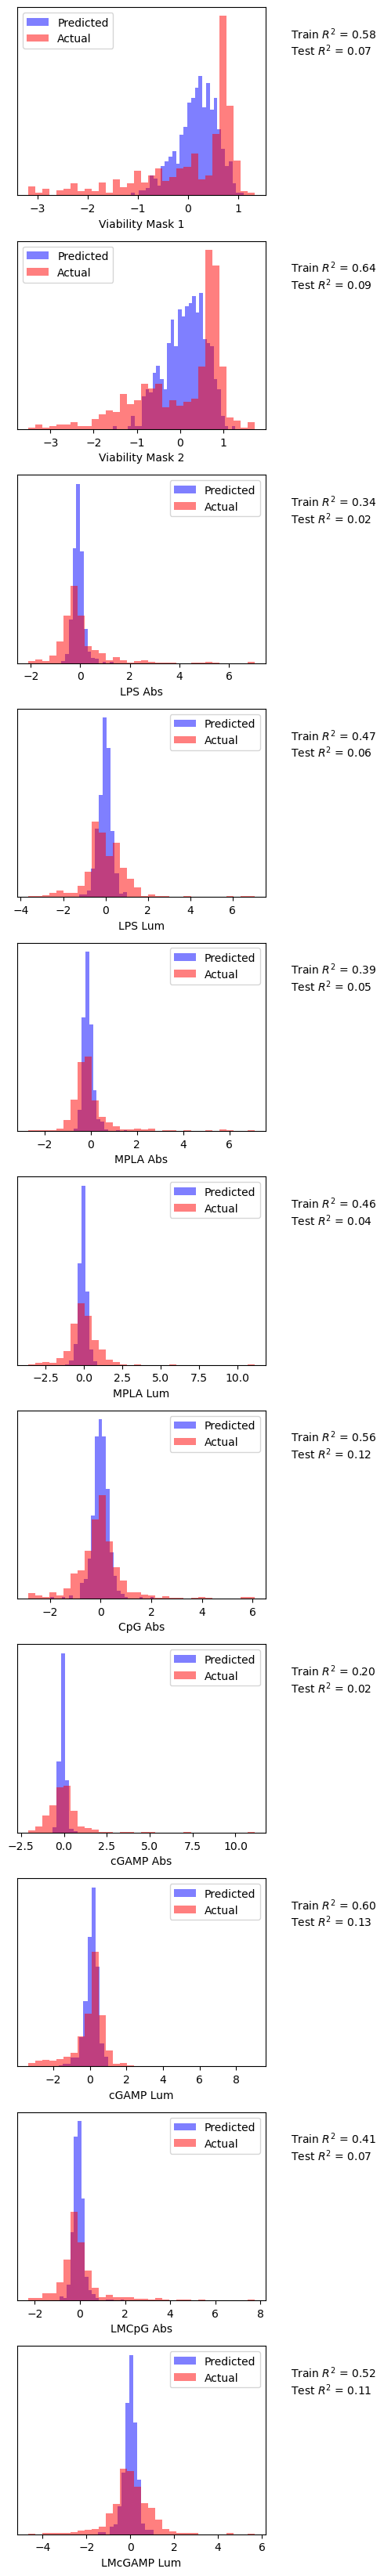

In [7]:
plot_regression_histograms(svr_dict, train_X, test_X, test, train)